**Homework 1 Starter**

Name: Chia-Yuan Chang

SID: 916420745


1. IMDB Scraping

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Write a function that takes a BeautifulSoup table of movies and parses out the movie attributes.

In [2]:
def getMovieResultsFromPage(table, movies):
  for rowRaw in table.find_all('div', class_='lister-item mode-detail'):
    # Read Name and Year from row
    row = rowRaw.find('h3', class_='lister-item-header')
    movies['Name'].append(row.select_one('a').text)
    movies['Year'].append(int(row.find('span', class_ = 'lister-item-year text-muted unbold').text[-5:-1]))

    row = rowRaw.find('div', class_='ipl-rating-star small')
    row = row.find('span', class_ = 'ipl-rating-star__rating').text

    # Read Rating from row
    movies['Rating'].append(float(row))

    # Find the genre of from row
    row = rowRaw.find('p', class_='text-muted text-small')
    stringGenre = row.find('span', class_ = 'genre').text.strip()
 
    # Now extract the first genre
    pos = stringGenre.find(',')
    if pos != -1:
      stringGenre = stringGenre[0: pos]
    movies['Genre'].append(stringGenre)

    # row is now alternating with Votes and Director info by <a>
    row = rowRaw.find('div', class_='lister-item-content')
    for row in row.find_all('p', class_='text-muted text-small'):
      # read Votes when there is no <a> tag
      if row.find('a') == None:
        if row.find('span', text='Votes:') != None:
          movies['Votes'].append(int(row.find('span', text = 'Votes:').find_next('span').text.replace(',', '')))
      # read Director's Name when there is <a> tag
      else:
        movies['Director'].append(row.find('a').text)

        


You'll need somewhere to store the movies

In [3]:
# initialize movie map, runtime removed since it is not required in the prompt
movies = {'Name':[],
          'Rating':[],
          'Year':[],
          'Votes':[],
          'Genre':[],
          'Director':[]}

In [4]:
source = requests.get('https://www.npmjs.com/package/vue').text

Next, process the html pages using BeautifulSoup, and create a table with all movies.

In [ ]:
# Load for page 1
source = requests.get('https://www.imdb.com/list/ls068082370/').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('div', class_='lister-list')

# Extract data and store them into movies
getMovieResultsFromPage(table, movies)

# Load for page 2
source = requests.get('https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=2').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('div', class_='lister-list')

# Extract data and store them into movies
getMovieResultsFromPage(table, movies)

# Load for page 3
source = requests.get('https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page=3').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('div', class_='lister-list')

# Extract data and store them into movies
getMovieResultsFromPage(table, movies)

# Display movies for debugging purpose
movies

In [6]:
# To answer the questions we need the data to be in a table
# create a data frame with pandas from the movie map
df = pd.DataFrame(movies, columns = ['Name', 'Rating', 'Year', 'Votes', 'Genre', 'Director'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      250 non-null    object 
 1   Rating    250 non-null    float64
 2   Year      250 non-null    int64  
 3   Votes     250 non-null    int64  
 4   Genre     250 non-null    object 
 5   Director  250 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.8+ KB


In [7]:
# Question 1
# Sort by number of Votes
df_sorted = df.sort_values(by = 'Votes', ascending = False)
df_sorted

,Name,Rating,Year,Votes,Genre,Director
0,The Shawshank Redemption,9.3,1994,2566345,Drama,Frank Darabont
2,The Dark Knight,9.1,2008,2529841,Action,Christopher Nolan
10,Inception,8.8,2010,2252348,Action,Christopher Nolan
12,Fight Club,8.8,1999,2019280,Drama,David Fincher
9,Forrest Gump,8.8,1994,1979462,Drama,Robert Zemeckis
...,...,...,...,...,...,...
162,Andaz Apna Apna,8.1,1994,52679,Action,Rajkumar Santoshi
151,Andrei Rublev,8.1,1966,52630,Biography,Andrei Tarkovsky
158,Sunrise,8.1,1927,50436,Drama,F.W. Murnau
200,Nights of Cabiria,8.1,1957,48019,Drama,Federico Fellini


In [8]:
# The movie receive the most vote is:
print("# The movie receive the most vote is:", df_sorted['Name'].iloc[0])
# The movie receive the least vote is:
print("# The movie receive the least vote is:", df_sorted['Name'].iloc[-1])

# The movie receive the most vote is: The Shawshank Redemption
# The movie receive the least vote is: Zulu


The Genre that has the most movie is Drama


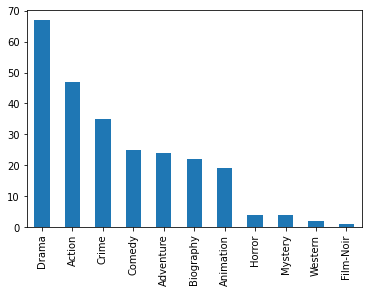

In [9]:
# Question 2
# A bar plot of Genre vs. Movie Count
frequency = df["Genre"].value_counts()
frequency.plot.bar()
print("The Genre that has the most movie is", frequency.index[0])

In [10]:
# Question 3
# Sort by Director's name and the number of movie they produce
value_count = df["Director"].value_counts()

# Output
print("The Top 5 Directors with the most number of movies in the Top 250 List are:")
value_count.head(5)

The Top 5 Directors with the most number of movies in the Top 250 List are:


Christopher Nolan    7
Steven Spielberg     7
Stanley Kubrick      7
Martin Scorsese      7
Alfred Hitchcock     6
Name: Director, dtype: int64

2. Severe Storms with Google BigQuery
 

In [11]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

KeyboardInterrupt: ignored

2. Declare the Cloud project ID which will be used throughout this notebook. You need to login your BigQuery to find out your own project id and paste it below.

In [ ]:
# For example mine is test-project-ecs189l, so I will run project_id = 'test-project-ecs189l'
# project_id = 'Paste Your Project ID here to Replace This String'
project_id = 'ecs189l-hw1-292515'

Read the database into a data frame

In [ ]:
# Read the database into df but not including event_begin_time as a column
# event_begin_time is parsed from 1950 to 2000
df = pd.io.gbq.read_gbq('''
SELECT
  LOWER(event_type) as event_type,
  COUNT(event_id) as count_storms
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  event_begin_time BETWEEN DATE("1950-01-01") AND DATE("2000-12-31")
GROUP BY
  event_type
ORDER BY
  count_storms DESC
LIMIT 40
''', project_id=project_id, dialect='standard')


In [ ]:
# Question 1
print("The 40 most frequent storm event types between years 1950 and 2000 are")
df

In [ ]:
# Question 2
# The top event type
print("The top event type is", df.event_type[0], " with" , df.count_storms[0], "counts")

In [ ]:
# Question 3
# A bar plot of tornados over each of the five decades: 1950, 1960, 1970, 1980, 1990

# Read database again
df = pd.io.gbq.read_gbq('''
SELECT
  *
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE
  event_begin_time BETWEEN DATE("1950-01-01") AND DATE("2000-12-31")
''', project_id=project_id, dialect='standard')

In [ ]:
# extract all the tornado record
from datetime import date, datetime

# Generate a new column 'Decade' by date
def get_season(t):
  for decade, (start, end) in decades:
    if start <= t <= end:
      return decade

Y = 1950
decades = [('1950s', (date(1950,  1, 1),  date(1959,  12, 31))),
           ('1960s', (date(1960,  1, 1),  date(1969,  12, 31))),
           ('1970s', (date(1970,  1, 1),  date(1979,  12, 31))),
           ('1980s', (date(1980,  1, 1),  date(1989, 12, 31))),
           ('1990s', (date(1990,  1, 1),  date(1999, 12, 31)))]

# Generate a new column 'Decade' by date
df['Decade'] = df['event_begin_time'].apply(get_season)
# Extract all the tornado entries
df_tornado = df[df.event_type == "tornado"]
# Sort them by decade for displaying purpose
df_tornado = df_tornado.sort_values('Decade')
# Count the number of tornados from each decades and plot
frequency = df_tornado["Decade"].value_counts()
frequency = frequency.sort_index()
frequency.plot.bar(rot = 1)

3. 2020 Election Polls

You are on your own here. Here are some suggestions:

* Identify and download the file you need from the web site
* Store the file in a data frame
* Answer the two questions

In [ ]:
# Download csv file
url = "https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv"
df = pd.read_csv(url)

In [ ]:
# Q1: How many unique presidential candidates were on the ballots overall?
order_by_name = df.groupby(['candidate_name']).count()
print("Overall there are", len(order_by_name), "unique presidential candidates on the ballots")

In [ ]:
# Q2: What was the average sample size in the national polls in 2020?

# Extract polls in 2020
df2020 = df[df.cycle == 2020]
print("The average sample size in the national polls in 2020 is", df2020.sample_size.mean())